In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
gratka2018 = pd.read_csv("./gratka2018.csv", sep=',')

In [3]:
rows, cols = gratka2018.shape
print("Number of examples:", rows)
print("Number of features:", cols)

Number of examples: 7383
Number of features: 39


In [4]:
english_names = ['Roof', 'Number of floors in the building', 'Condition', 'Water', 'Type', 'Usable Area', 'Building Material', 'Area', 'Investition Name', 'Number of Parking Spots', 'URL', 'Elevation', 'Instalation Condition', 'Electricity', 'Ownership Type', 'Has Bathroom', 'Parking Slots2', 'Type of Room', 'Floor', 'Building Year', 'Gas', 'Description', 'Total Surface Area', 'Fence Type', 'Basement', 'Sewage System', 'Bathroom Condition', 'Rooms', 'Kitchen Type', 'Parking Spot', 'Window Type', 'Available Time', 'Access Road', 'Noisiness', 'Attic', 'Construction', 'Area Shape', 'Expected', 'Number of Spaces']

In [5]:
gratka2018.columns = english_names

In [146]:
print("Print number of offer with full information:", gratka2018.dropna().shape[0])

Print number of offer with full information: 0


In [6]:
# Parse the expected column to numeric form
gratka2018['Expected'] = gratka2018['Expected'].map(lambda x: x.split(',')[0].replace(' ', '')).astype(int)

In [129]:
def parse_rooms(x):
    if 'więcej' in str(x):
        return 9
    else:
        return x

gratka2018['Rooms'] = gratka2018['Rooms'].map(parse_rooms).astype(float)
gratka2018['Rooms'].fillna(gratka2018['Rooms'].mean(), inplace=True)

In [130]:
zero_exptected = (gratka2018['Expected'] == 0).sum()
print("Number of flats with 0 cost:", zero_exptected)

Number of flats with 0 cost: 130


In [131]:
less_than_10k = ((gratka2018['Expected'] > 0) & (gratka2018['Expected'] < 10000)).sum()
print("Number of flats with cost higher than 0 and less than 10k PLN:", less_than_10k)

Number of flats with cost higher than 0 and less than 10k PLN: 190


In [132]:
data_valid = gratka2018[gratka2018['Expected'] >= 10 ** 4]
print("Houses with cost higher than 10k:", data_valid.shape[0])

Houses with cost higher than 10k: 7063


In [294]:
print("Mean cost %.2f" % data_valid['Expected'].mean())

Mean cost 676320.12


In [134]:
data_valid.groupby('Type').mean()

,Number of floors in the building,Usable Area,Area,Number of Parking Spots,Parking Slots2,Building Year,Total Surface Area,Rooms,Expected,Number of Spaces
Type,,,,,,,,,,
apartamentowiec,5.031785,NaN,61.004684,1.0,NaN,2010.830619,NaN,2.504980,497021.608899,NaN
blok,6.051788,NaN,53.713083,1.0,NaN,1992.459660,NaN,2.505536,346371.799270,NaN
dom wielorodzinny/szeregowiec,2.069869,NaN,70.154506,1.0,NaN,1988.423077,NaN,2.952790,397442.476395,NaN
kamienica,3.817460,NaN,76.220952,NaN,NaN,1924.314642,NaN,2.822146,450901.594286,NaN
plomba,4.200000,NaN,57.800000,1.0,NaN,1997.250000,NaN,2.800000,332400.000000,NaN


In [180]:
translated = {'mieszkanie': 'flat', 'dom': 'house', 'lokal': 'business premises', 'Inne': 'Other'}
def get_type_from_url(url):
    words = url.split('/')[-3].split('-')
    if words[0] in ['nowe', 'komfortowe', 'atrakcyjne', 'wygodny', 'nowoczesne']:
        t = words[1]
    else:
        t = words[0]
    if t not in ['mieszkanie', 'dom', 'lokal']:
        t =  'Inne'
    return translated[t]
data_valid['TypeURL'] = data_valid.URL.map(get_type_from_url)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


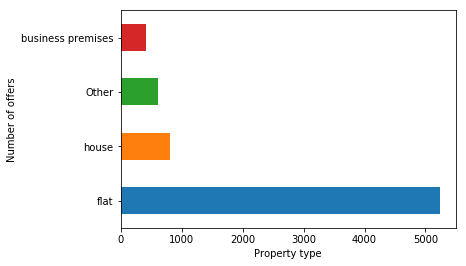

In [198]:
ax = data_valid['TypeURL'].value_counts().plot(kind='barh')
ax.set_xlabel("Property type")
ax.set_ylabel("Number of offers")
plt.show()

TypeURL
Other                1.970276e+06
business premises    1.990797e+06
flat                 3.732937e+05
house                9.814662e+05
Name: Expected, dtype: float64

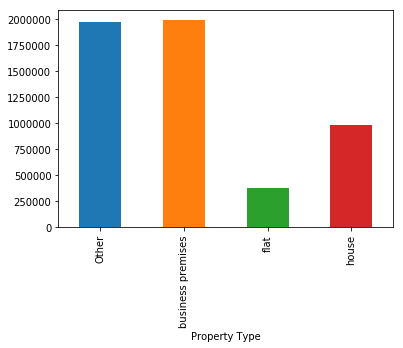

In [297]:
ax = data_valid.groupby('TypeURL').mean()['Expected'].plot(kind='bar')
ax.set_xlabel("Property Type")
plt.plot()
data_valid.groupby('TypeURL').mean()['Expected']

In [179]:
pd.crosstab(data_valid['TypeURL'], data_valid['Type'])

Type,apartamentowiec,blok,dom wielorodzinny/szeregowiec,kamienica,plomba
TypeURL,,,,,
Other,0,1,1,0,0
flat,427,3561,232,525,5


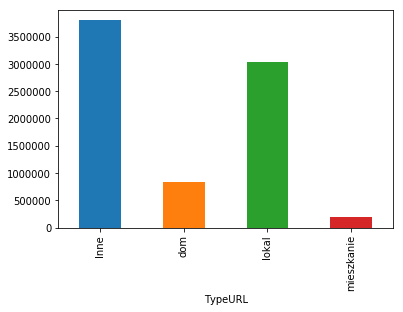

In [138]:
data_valid.groupby('TypeURL').std()['Expected'].plot(kind='bar')

In [152]:
num_features = []
for idx, row in data_valid.iterrows():
    num_features.append((~(row.isna() | row.isnull())).sum())
data_valid['Num Features'] = num_features

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Mean of features: 12.43
Std of features: 3.28


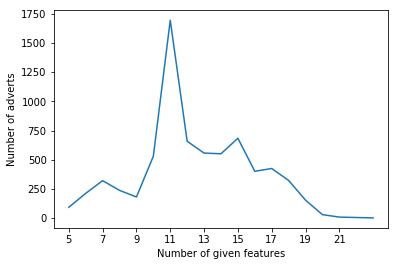

In [174]:
print('Mean of features: %.2f' % data_valid['Num Features'].mean())
print('Std of features: %.2f' % data_valid['Num Features'].std())
feature_data = data_valid['Num Features'].value_counts().sort_index()

plt.plot(feature_data.index, feature_data)
plt.xlabel("Number of given features")
plt.ylabel("Number of adverts")
plt.xticks(range(5, 23, 2))
plt.show()

In [139]:
mieszkalne = data_valid[(data_valid['TypeURL']  == 'dom') | (data_valid['TypeURL'] == 'mieszkanie')]

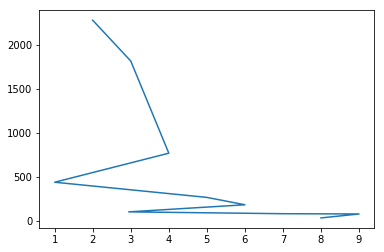

In [142]:
mieszkalne.Rooms.value_counts().plot()

In [298]:
tt = []
for url in data_valid.URL:
    for d in ['wilda', 'centrum', 'grunwald', 'ogrody', 'naramowice', 'winogrady', 'jezyce',
              'lazarz', 'junikowo', 'gorczyn', 'piatkowo', 'podolany',
              'stare-miasto', 'rataje', 'staroleka', 'antoninek', 'srodka', 'malta', 'debiec',
              'lawica', 'szczepankowo', 'umultowo', 'rozany-potok', 'morasko', 'garbary',
              'nowe-miasto']:
        if d in url.split('/')[-3]:
            tt.append(d)
            break
    else:
        tt.append('other')
data_valid['Localization'] = tt

distinct_prices = data_valid.groupby('Localization').mean()['Expected']
distinct_counts = data_valid['Localization'].value_counts()


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


/home/tomasz/.local/lib/python3.6/site-packages/matplotlib/legend.py:649: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


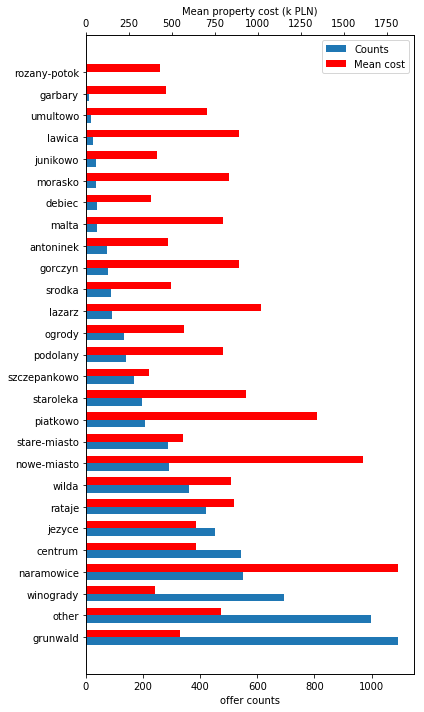

In [293]:
index = np.arange(len(distinct_counts))
bar_width = 0.35

fig, ax1 = plt.subplots()
fig.set_size_inches(6, 10)
ax1.barh(index, distinct_counts, bar_width, label='Counts')
ax1.set_xlabel('offer counts')


ax2 = ax1.twiny()
ax2.barh(index +  bar_width, distinct_prices / 1000, bar_width, color='red', label='Mean cost')
ax2.set_xlabel('Mean property cost (k PLN)')
ax2.set_yticks(index + bar_width / 2)
ax2.set_yticklabels(tuple(distinct_counts.index))

fig.legend(loc=0, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout()
plt.show()

In [299]:
data_valid[data_valid['Localization'] == 'naramowice']['TypeURL'].value_counts()

flat                 500
house                 32
Other                 11
business premises      8
Name: TypeURL, dtype: int64

In [300]:
pd.crosstab(data_valid['Localization'], data_valid['TypeURL'] )

TypeURL,Other,business premises,flat,house
Localization,,,,
antoninek,9,4,49,12
centrum,12,32,484,15
debiec,2,1,31,4
garbary,0,3,6,0
gorczyn,3,8,48,17
grunwald,63,62,852,117
jezyce,59,55,268,68
junikowo,5,4,11,14
lawica,8,1,2,12


In [301]:
mieszkalne =  data_valid[(data_valid['TypeURL'] == 'flat') | ( data_valid['TypeURL'] == 'house')]

In [302]:
mieszkalne.shape[0]

6034

In [305]:
# Remove entries with no area information
mieszkalne = mieszkalne[~mieszkalne['Area'].isna()]

In [306]:
mieszkalne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6031 entries, 0 to 7382
Data columns (total 42 columns):
Roof                                479 non-null object
Number of floors in the building    5807 non-null float64
Condition                           1499 non-null object
Water                               0 non-null object
Type                                4750 non-null object
Usable Area                         2 non-null float64
Building Material                   2565 non-null object
Area                                6031 non-null float64
Investition Name                    488 non-null object
Number of Parking Spots             9 non-null float64
URL                                 6031 non-null object
Elevation                           157 non-null object
Instalation Condition               1270 non-null object
Electricity                         0 non-null object
Ownership Type                      2544 non-null object
Has Bathroom                        45 non-null o

In [314]:
mieszkalne = mieszkalne[[column for column in mieszkalne.columns if mieszkalne[column].count() > 1000]]

In [315]:
mieszkalne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6031 entries, 0 to 7382
Data columns (total 20 columns):
Number of floors in the building    5807 non-null float64
Condition                           1499 non-null object
Type                                4750 non-null object
Building Material                   2565 non-null object
Area                                6031 non-null float64
URL                                 6031 non-null object
Instalation Condition               1270 non-null object
Ownership Type                      2544 non-null object
Floor                               5198 non-null object
Building Year                       2429 non-null float64
Description                         6031 non-null object
Rooms                               6031 non-null float64
Kitchen Type                        1969 non-null object
Parking Spot                        6031 non-null object
Window Type                         3735 non-null object
Noisiness                         

In [318]:
mieszkalne['Number of floors in the building'].mean()

5.248837609781298

In [320]:
mieszkalne['Parking Spot'].value_counts()

 brak miejsca parkingowego    3811
 w garażu                     1825
 przynależne na ulicy          301
 parking strzeżony              83
 pod wiatą                      11
Name: Parking Spot, dtype: int64

In [321]:
mieszkalne['Window Type'].value_counts()

 plastikowe/PCV    3476
 drewniane          258
 aluminiowe           1
Name: Window Type, dtype: int64

In [437]:
X = mieszkalne[['Area', 'Rooms', 'TypeURL', 'Localization']]

In [438]:
X = pd.get_dummies(X, drop_first=False)

In [439]:
X.head()

,Area,Rooms,TypeURL_flat,TypeURL_house,Localization_antoninek,Localization_centrum,Localization_debiec,Localization_garbary,Localization_gorczyn,Localization_grunwald,...,Localization_podolany,Localization_rataje,Localization_rozany-potok,Localization_srodka,Localization_stare-miasto,Localization_staroleka,Localization_szczepankowo,Localization_umultowo,Localization_wilda,Localization_winogrady
0,44.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,62.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104.0,5.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104.0,5.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [440]:
y = mieszkalne['Expected']

In [441]:
from sklearn.model_selection import train_test_split

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [443]:
from sklearn.metrics import mean_squared_error

In [444]:
# Baseline model 1: mean
mean = y_train.mean()
print('mean:', mean)

predicted = [mean for e in range(X_test.shape[0])]
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(rmse)

mean: 450731.9317993366
509858.69574644486


In [445]:
# Baseline model 2: by type
means = {'flat' : y_train[X_train['TypeURL_flat'] == 1].mean(),
         'house' : y_train[X_train['TypeURL_house'] == 1].mean()}

predicted = [means['flat'] * row['TypeURL_flat']  +  means['house'] * row['TypeURL_house']
             for idx, row in X_test.iterrows()]

rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(rmse)

449749.6076690219


In [451]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge

In [504]:
model = LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted))

print(rmse)

388061.35858919803


In [505]:
for feature in X_train.columns:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)

    predicted = model.predict(X_test[[feature]])
    rmse = np.sqrt(mean_squared_error(y_test, predicted))

    print(feature, rmse)

Area 432959.3014065581
Rooms 443343.0847349997
TypeURL_flat 449749.60766902193
TypeURL_house 449749.60766902193
Localization_antoninek 509850.18349616305
Localization_centrum 509334.79767727625
Localization_debiec 509800.805089735
Localization_garbary 509854.97008263
Localization_gorczyn 509852.1387991399
Localization_grunwald 509846.85661171546
Localization_jezyce 509126.3956959101
Localization_junikowo 509435.6095974154
Localization_lawica 509894.9249257325
Localization_lazarz 510427.32916146686
Localization_malta 509909.24231230194
Localization_morasko 509729.78301610576
Localization_naramowice 508747.53388643917
Localization_nowe-miasto 509957.7575941699
Localization_ogrody 509773.8926631505
Localization_other 510176.44975627924
Localization_piatkowo 509863.0994360676
Localization_podolany 509843.27576137637
Localization_rataje 509474.1639350051
Localization_rozany-potok 509862.62210050994
Localization_srodka 509492.7536836914
Localization_stare-miasto 508726.37069325725
Localizati

In [456]:
subset = ('Area',)
model = LinearRegression()
model.fit(X_train[list(subset)], y_train)

predicted = model.predict(X_test[list(subset)])
print(np.sqrt(mean_squared_error(y_test, predicted)))

432959.3014065581


In [454]:
lasso = Lasso()
lasso.fit(X_train, y_train)

predicted = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predicted)))
print(lasso.coef_)

388063.85297332035
[ 4.92112232e+02  9.35666976e+04 -2.43449248e+05  9.77215189e-08
 -1.40206126e+04  1.88846877e+05 -1.63178286e+04  1.40181508e+05
 -4.54503036e+04  3.12879737e+04 -4.02930454e+03  3.27514019e+04
 -6.80118693e+04  1.62933907e+05  1.08796738e+05 -1.33351239e+05
 -4.79202638e+04  8.24645594e+03 -3.33515740e+04  6.87368290e+02
  1.98783790e+04  8.01555405e+02 -4.74324358e+03 -1.45270748e+05
 -3.13508930e+04  1.44636831e+05 -3.93932745e+04 -6.61250881e+02
 -6.67034863e+04  2.66823993e+03  2.58335958e+04]


/home/tomasz/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [455]:
ridge = Ridge()
ridge.fit(X_train, y_train)

predicted = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predicted)))
print(ridge.coef_)

388102.2583059108
[    492.36777176   93583.18350382 -121220.79003988  121220.79003987
  -24221.63876879  177629.16208164  -26182.68045403  104458.57137349
  -55050.2950686    20551.46509439  -14646.76794298   21433.49521164
  -72823.88334177  150075.73934534   95202.41080866 -135994.5835654
  -58558.60980122   -2399.51464096  -43717.65812539   -9826.78162232
    9185.4108892    -9740.5371034   -15527.82849765  -80028.66848117
  -41664.49237221  133125.59279913  -49848.66864879  -10680.2254307
  -67737.67756525   -8063.23756321   15051.90139047]


In [450]:
enet = ElasticNet()
enet.fit(X_train, y_train)

predicted = enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predicted)))
print(enet.coef_)

396977.63022386155
[ 5.98433119e+02  8.96624408e+04 -3.38690704e+04  3.38690704e+04
 -4.92036307e+02  2.11471462e+04 -4.31830339e+02  1.52817447e+02
 -1.02704807e+03  1.26741921e+03 -1.84823079e+03  5.04964329e+02
  1.58416999e+02  3.40116819e+03  9.54640241e+02 -1.09652270e+02
 -1.20867951e+04 -9.61608363e+02 -2.58487197e+03  8.13913804e+02
  1.26911952e+02 -7.44960144e+02 -5.86664399e+03 -1.28237070e+01
 -2.27775465e+03  7.24057863e+03 -4.25722622e+03  2.12338338e+03
  9.54789063e+01 -3.47582339e+03 -1.80653403e+03]


In [457]:
from sklearn.neighbors import KNeighborsClassifier

In [469]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    predicted = knn.predict(X_test)
    print(k, ':', np.sqrt(mean_squared_error(y_test, predicted)))

1 : 332836.7057458255
2 : 351371.95185821067
3 : 380579.3874830347
4 : 389474.4400345211
5 : 354513.54813327733
6 : 357077.431089495
7 : 361330.15849552123
8 : 356772.7594845509
9 : 355423.42500948976
10 : 380142.1251184756


444320.9997773988


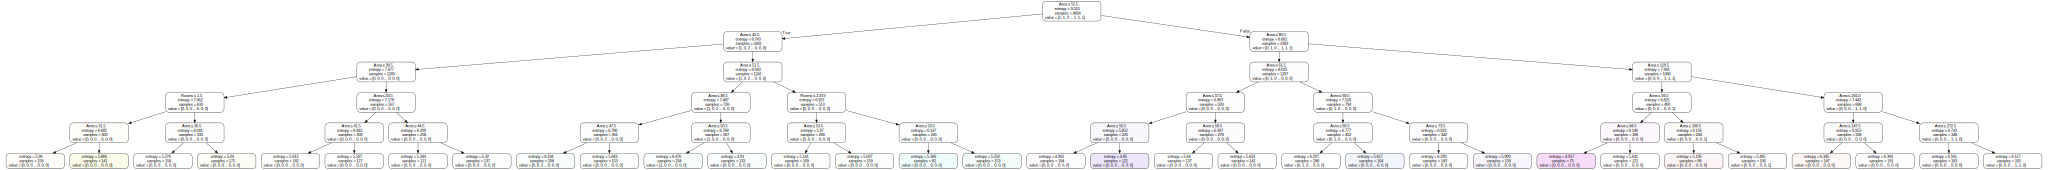

In [500]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 

tree = DecisionTreeClassifier('entropy', max_depth=5)
tree.fit(X_train, y_train)

predicted = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted))

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("iris") 
print(rmse)
graph

In [503]:
from sklearn.svm import SVR

svm = DecisionTreeClassifier()
svm.fit(X_train, y_train)

predicted = svm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(rmse)

355171.4169106946


In [479]:
X_train_flat = X_train[X_train['TypeURL_flat'] == 1]
y_train_flat = y_train[X_train['TypeURL_flat'] == 1]

X_test_flat = X_test[X_test['TypeURL_flat'] == 1]
y_test_flat = y_test[X_test['TypeURL_flat'] == 1]


model = LinearRegression()
model.fit(X_train_flat, y_train_flat)

predicted = model.predict(X_test_flat)
rmse = np.sqrt(mean_squared_error(y_test_flat, predicted))
print(model.coef_, model.intercept_)
print(rmse)

[ 1.57313021e+03  7.21965372e+04 -3.20142135e-10  2.76486389e-10
 -1.26803380e+04  1.18145033e+05 -2.29871419e+04  1.10598003e+05
 -1.93733212e+04  6.47121484e+03  9.81622354e+02 -5.00503464e+04
 -5.03724607e+04  8.99663444e+04  8.46055445e+04 -2.27328477e+04
 -6.07866023e+04 -6.97641492e+02 -3.34067826e+04 -1.27602629e+04
  9.65167159e+01 -4.27078738e+04 -2.15719336e+04 -3.63797881e-11
 -4.42693622e+04  9.30980205e+04 -4.69709189e+04 -1.02392959e+05
  6.17681219e+04 -1.28866969e+04 -9.08293230e+03] 93328.55344803212
233515.2272985124


In [480]:
X_train_house = X_train[X_train['TypeURL_house'] == 1]
y_train_house = y_train[X_train['TypeURL_house'] == 1]

X_test_house = X_test[X_test['TypeURL_house'] == 1]
y_test_house = y_test[X_test['TypeURL_house'] == 1]


model = LinearRegression()
model.fit(X_train_house, y_train_house)

predicted = model.predict(X_test_house)
rmse = np.sqrt(mean_squared_error(y_test_house, predicted))
print(model.coef_, model.intercept_)
print(rmse)

[ 4.11947893e+02  9.33432275e+04 -3.49245965e-10 -2.32830644e-10
 -1.69665217e+05  1.30618078e+06 -1.43261204e+05 -7.85803422e-10
 -2.33009433e+05 -1.03564649e+03 -1.52620495e+05  5.58343143e+04
 -1.17211314e+05  1.18684241e+06  3.51551973e+04 -1.81443107e+05
 -1.14065373e+05 -1.11450639e+05 -1.85585429e+05 -7.58571972e+04
 -4.81903370e+04  7.75472360e+04 -6.32825506e+05 -1.74807043e+05
 -1.45519152e-11  2.67498821e+05 -3.94338748e+05 -1.61911099e+04
 -1.30889249e+05 -2.63713504e+05  2.17101798e+05] 373401.90639551706
997436.7827411246


In [485]:
mieszkalne.corr()

,Number of floors in the building,Area,Building Year,Rooms,Expected,Num Features
Number of floors in the building,1.000000,-0.118502,0.042147,-0.230481,-0.190971,-0.269291
Area,-0.118502,1.000000,-0.014910,0.322047,0.472843,0.022863
Building Year,0.042147,-0.014910,1.000000,-0.019108,-0.015326,0.014569
Rooms,-0.230481,0.322047,-0.019108,1.000000,0.536896,0.103779
Expected,-0.190971,0.472843,-0.015326,0.536896,1.000000,0.093094
Num Features,-0.269291,0.022863,0.014569,0.103779,0.093094,1.000000


In [506]:
import nltk

In [509]:
docs = list(mieszkalne.Description)

In [508]:
docs

0        VILLA VENECJA - KOMFORT W CENTRUM MIASTAINFOR...
1        Polecam mieszkanie w wykończeniu na wysoki st...
2        Mikro-apartamenty smART to samodzielne małe m...
3        DLACZEGO WARTO Z NAMI ZAMIESZKAĆ Najwyższy St...
4        DLACZEGO WARTO Z NAMI ZAMIESZKAĆ Najwyższy St...
5                                                   opis:
6                                                   opis:
7                                                   opis:
8                                                   opis:
9                                                   opis:
10                                                  opis:
11                                                  opis:
12       Po sukcesach osiągniętych w 2017 roku przez r...
13                                                  opis:
14                                                  opis:
15                                                  opis:
16                                                  opis:
17            